### Importación de datos



In [341]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda1["Tienda"] = "Tienda 1"
tienda2 = pd.read_csv(url2)
tienda2["Tienda"] = "Tienda 2"
tienda3 = pd.read_csv(url3)
tienda3["Tienda"] = "Tienda 3"
tienda4 = pd.read_csv(url4)
tienda4["Tienda"] = "Tienda 4"

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon,Tienda
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175,Tienda 1
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359,Tienda 1
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444,Tienda 1
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250,Tienda 1
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359,Tienda 1


#1. Análisis de facturación



In [382]:
#todas las tiendas en un solo DataFrame
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
df["Precio"] = pd.to_numeric(df["Precio"], errors="coerce")

#ingreso total por tienda
ingreso_total = df.groupby("Tienda")["Precio"].sum().reset_index()
ingreso_total = ingreso_total.rename(columns={"Precio" : "Precio(USD)"})

ingreso_total['Precio(USD)'] = ingreso_total['Precio(USD)'] / 1_000_000

In [384]:
#mayor a menor según la columna Precio
ingreso_total = ingreso_total.sort_values(by="Precio(USD)", ascending=False)
display(ingreso_total.style.format({"Precio(USD)": "${:,.0f}MM"}).hide(axis="index"))

Tienda,Precio(USD)
Tienda 1,"$1,151MM"
Tienda 2,"$1,116MM"
Tienda 3,"$1,098MM"
Tienda 4,"$1,038MM"


# 2. Ventas por categoría

In [345]:
# Tienda 1
ventas_categoria_t1 = tienda1.groupby("Categoría del Producto")["Producto"].count().reset_index()
ventas_categoria_t1 = ventas_categoria_t1.rename(columns={"Producto": "Cantidad_Vendida"})
ventas_categoria_t1 = ventas_categoria_t1.sort_values("Cantidad_Vendida", ascending=False)
print("Ventas por categoría - Tienda 1")
print(ventas_categoria_t1.to_string(index=False))
print("\n")

# Tienda 2
ventas_categoria_t2 = tienda2.groupby("Categoría del Producto")["Producto"].count().reset_index()
ventas_categoria_t2 = ventas_categoria_t2.rename(columns={"Producto": "Cantidad_Vendida"})
ventas_categoria_t2 = ventas_categoria_t2.sort_values("Cantidad_Vendida", ascending=False)
print("Ventas por categoría - Tienda 2")
print(ventas_categoria_t2.to_string(index=False))
print("\n")

# Tienda 3
ventas_categoria_t3 = tienda3.groupby("Categoría del Producto")["Producto"].count().reset_index()
ventas_categoria_t3 = ventas_categoria_t3.rename(columns={"Producto": "Cantidad_Vendida"})
ventas_categoria_t3 = ventas_categoria_t3.sort_values("Cantidad_Vendida", ascending=False)
print("Ventas por categoría - Tienda 3")
print(ventas_categoria_t3.to_string(index=False))
print("\n")

# Tienda 4
ventas_categoria_t4 = tienda4.groupby("Categoría del Producto")["Producto"].count().reset_index()
ventas_categoria_t4 = ventas_categoria_t4.rename(columns={"Producto": "Cantidad_Vendida"})
ventas_categoria_t4 = ventas_categoria_t4.sort_values("Cantidad_Vendida", ascending=False)
print("Ventas por categoría - Tienda 4")
print(ventas_categoria_t4.to_string(index=False))

Ventas por categoría - Tienda 1
 Categoría del Producto  Cantidad_Vendida
                Muebles               465
           Electrónicos               448
               Juguetes               324
      Electrodomésticos               312
   Deportes y diversión               284
 Instrumentos musicales               182
                 Libros               173
Artículos para el hogar               171


Ventas por categoría - Tienda 2
 Categoría del Producto  Cantidad_Vendida
                Muebles               442
           Electrónicos               422
               Juguetes               313
      Electrodomésticos               305
   Deportes y diversión               275
 Instrumentos musicales               224
                 Libros               197
Artículos para el hogar               181


Ventas por categoría - Tienda 3
 Categoría del Producto  Cantidad_Vendida
                Muebles               499
           Electrónicos               451
               Jug

In [388]:
#bucle para no repetir mismo código una y otra vez
tiendas_dict = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

for nombre, df_tienda in tiendas_dict.items():
    ventas_categoria = df_tienda.groupby("Categoría del Producto")["Producto"].count().reset_index()
    ventas_categoria = ventas_categoria.rename(columns={"Producto": "Cantidad_Vendida"})
    ventas_categoria = ventas_categoria.sort_values("Cantidad_Vendida", ascending=False)

    print(f"Ventas por categoría - {nombre}")
    print(ventas_categoria.to_string(index=False))
    print("\n")

Ventas por categoría - Tienda 1
 Categoría del Producto  Cantidad_Vendida
                Muebles               465
           Electrónicos               448
               Juguetes               324
      Electrodomésticos               312
   Deportes y diversión               284
 Instrumentos musicales               182
                 Libros               173
Artículos para el hogar               171


Ventas por categoría - Tienda 2
 Categoría del Producto  Cantidad_Vendida
                Muebles               442
           Electrónicos               422
               Juguetes               313
      Electrodomésticos               305
   Deportes y diversión               275
 Instrumentos musicales               224
                 Libros               197
Artículos para el hogar               181


Ventas por categoría - Tienda 3
 Categoría del Producto  Cantidad_Vendida
                Muebles               499
           Electrónicos               451
               Jug

In [394]:
for nombre, df_tienda in tiendas_dict.items():
    #ventas por categoría
    ventas_categoria = (
        df_tienda.groupby("Categoría del Producto")["Producto"]
        .count()
        .reset_index()
        .rename(columns={"Producto": "Cantidad_Vendida"})
        .sort_values("Cantidad_Vendida", ascending=False)
    )

    print(f"Ventas por categoría - {nombre}")
    df_categoria = pd.DataFrame(ventas_categoria)
    display(df_categoria.style.hide(axis="index"))  # Mostrar sin índice
    print("\n")

Ventas por categoría - Tienda 1


Categoría del Producto,Cantidad_Vendida
Muebles,465
Electrónicos,448
Juguetes,324
Electrodomésticos,312
Deportes y diversión,284
Instrumentos musicales,182
Libros,173
Artículos para el hogar,171




Ventas por categoría - Tienda 2


Categoría del Producto,Cantidad_Vendida
Muebles,442
Electrónicos,422
Juguetes,313
Electrodomésticos,305
Deportes y diversión,275
Instrumentos musicales,224
Libros,197
Artículos para el hogar,181




Ventas por categoría - Tienda 3


Categoría del Producto,Cantidad_Vendida
Muebles,499
Electrónicos,451
Juguetes,315
Electrodomésticos,278
Deportes y diversión,277
Libros,185
Artículos para el hogar,177
Instrumentos musicales,177




Ventas por categoría - Tienda 4


Categoría del Producto,Cantidad_Vendida
Muebles,480
Electrónicos,451
Juguetes,338
Deportes y diversión,277
Electrodomésticos,254
Artículos para el hogar,201
Libros,187
Instrumentos musicales,170


# 3. Calificación promedio de la tienda


In [347]:
# Tienda 1
valoracion_t1 = tienda1["Calificación"].mean()
print(f"Calificación promedio - Tienda 1: {valoracion_t1:.2f}")

# Tienda 2
valoracion_t2 = tienda2["Calificación"].mean()
print(f"Calificación promedio - Tienda 2: {valoracion_t2:.2f}")

# Tienda 3
valoracion_t3 = tienda3["Calificación"].mean()
print(f"Calificación promedio - Tienda 3: {valoracion_t3:.2f}")

# Tienda 4
valoracion_t4 = tienda4["Calificación"].mean()
print(f"Calificación promedio - Tienda 4: {valoracion_t4:.2f}")

Calificación promedio - Tienda 1: 3.98
Calificación promedio - Tienda 2: 4.04
Calificación promedio - Tienda 3: 4.05
Calificación promedio - Tienda 4: 4.00


In [348]:
#bucle para no repetir mismo código una y otra vez
for nombre, df_tienda in tiendas_dict.items():
    calificacion_prom = df_tienda["Calificación"].mean()
    print(f"Calificación promedio - {nombre}: {calificacion_prom:.2f}")

Calificación promedio - Tienda 1: 3.98
Calificación promedio - Tienda 2: 4.04
Calificación promedio - Tienda 3: 4.05
Calificación promedio - Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [349]:
# Tienda 1
productos_t1 = tienda1.groupby("Producto")["Producto"].count().reset_index(name="Cantidad_Vendida")
productos_t1 = productos_t1.sort_values("Cantidad_Vendida", ascending=False)
print("Tienda 1 - Producto más vendido:", productos_t1.iloc[0]["Producto"])
print("Tienda 1 - Producto menos vendido:", productos_t1.iloc[-1]["Producto"])
print("\n")

# Tienda 2
productos_t2 = tienda2.groupby("Producto")["Producto"].count().reset_index(name="Cantidad_Vendida")
productos_t2 = productos_t2.sort_values("Cantidad_Vendida", ascending=False)
print("Tienda 2 - Producto más vendido:", productos_t2.iloc[0]["Producto"])
print("Tienda 2 - Producto menos vendido:", productos_t2.iloc[-1]["Producto"])
print("\n")

# Tienda 3
productos_t3 = tienda3.groupby("Producto")["Producto"].count().reset_index(name="Cantidad_Vendida")
productos_t3 = productos_t3.sort_values("Cantidad_Vendida", ascending=False)
print("Tienda 3 - Producto más vendido:", productos_t3.iloc[0]["Producto"])
print("Tienda 3 - Producto menos vendido:", productos_t3.iloc[-1]["Producto"])
print("\n")

# Tienda 4
productos_t4 = tienda4.groupby("Producto")["Producto"].count().reset_index(name="Cantidad_Vendida")
productos_t4 = productos_t4.sort_values("Cantidad_Vendida", ascending=False)
print("Tienda 4 - Producto más vendido:", productos_t4.iloc[0]["Producto"])
print("Tienda 4 - Producto menos vendido:", productos_t4.iloc[-1]["Producto"])

Tienda 1 - Producto más vendido: Armario
Tienda 1 - Producto menos vendido: Auriculares con micrófono


Tienda 2 - Producto más vendido: Iniciando en programación
Tienda 2 - Producto menos vendido: Juego de mesa


Tienda 3 - Producto más vendido: Kit de bancas
Tienda 3 - Producto menos vendido: Bloques de construcción


Tienda 4 - Producto más vendido: Cama box
Tienda 4 - Producto menos vendido: Guitarra eléctrica


In [350]:
# Tienda 1
productos_t1 = tienda1.groupby("Producto")["Producto"].count().reset_index(name="Cantidad_Vendida")
productos_t1 = productos_t1.sort_values("Cantidad_Vendida", ascending=False)
print(f"Tienda 1 - Producto más vendido: {productos_t1.iloc[0]['Producto']} ({productos_t1.iloc[0]['Cantidad_Vendida']} unidades)")
print(f"Tienda 1 - Producto menos vendido: {productos_t1.iloc[-1]['Producto']} ({productos_t1.iloc[-1]['Cantidad_Vendida']} unidades)\n")

# Tienda 2
productos_t2 = tienda2.groupby("Producto")["Producto"].count().reset_index(name="Cantidad_Vendida")
productos_t2 = productos_t2.sort_values("Cantidad_Vendida", ascending=False)
print(f"Tienda 2 - Producto más vendido: {productos_t2.iloc[0]['Producto']} ({productos_t2.iloc[0]['Cantidad_Vendida']} unidades)")
print(f"Tienda 2 - Producto menos vendido: {productos_t2.iloc[-1]['Producto']} ({productos_t2.iloc[-1]['Cantidad_Vendida']} unidades)\n")

# Tienda 3
productos_t3 = tienda3.groupby("Producto")["Producto"].count().reset_index(name="Cantidad_Vendida")
productos_t3 = productos_t3.sort_values("Cantidad_Vendida", ascending=False)
print(f"Tienda 3 - Producto más vendido: {productos_t3.iloc[0]['Producto']} ({productos_t3.iloc[0]['Cantidad_Vendida']} unidades)")
print(f"Tienda 3 - Producto menos vendido: {productos_t3.iloc[-1]['Producto']} ({productos_t3.iloc[-1]['Cantidad_Vendida']} unidades)\n")

# Tienda 4
productos_t4 = tienda4.groupby("Producto")["Producto"].count().reset_index(name="Cantidad_Vendida")
productos_t4 = productos_t4.sort_values("Cantidad_Vendida", ascending=False)
print(f"Tienda 4 - Producto más vendido: {productos_t4.iloc[0]['Producto']} ({productos_t4.iloc[0]['Cantidad_Vendida']} unidades)")
print(f"Tienda 4 - Producto menos vendido: {productos_t4.iloc[-1]['Producto']} ({productos_t4.iloc[-1]['Cantidad_Vendida']} unidades)\n")

Tienda 1 - Producto más vendido: Armario (60 unidades)
Tienda 1 - Producto menos vendido: Auriculares con micrófono (33 unidades)

Tienda 2 - Producto más vendido: Iniciando en programación (65 unidades)
Tienda 2 - Producto menos vendido: Juego de mesa (32 unidades)

Tienda 3 - Producto más vendido: Kit de bancas (57 unidades)
Tienda 3 - Producto menos vendido: Bloques de construcción (35 unidades)

Tienda 4 - Producto más vendido: Cama box (62 unidades)
Tienda 4 - Producto menos vendido: Guitarra eléctrica (33 unidades)



In [351]:
#bucle para no repetir mismo código una y otra vez
tabla_datos = []
for nombre, df_tienda in tiendas_dict.items():
    productos = df_tienda.groupby("Producto")["Producto"].count().reset_index(name="Cantidad_Vendida")
    productos = productos.sort_values("Cantidad_Vendida", ascending=False)

    producto_mas_vendido = productos.iloc[0]
    producto_menos_vendido = productos.iloc[-1]

    print(f"{nombre} - Producto más vendido: {producto_mas_vendido['Producto']} ({producto_mas_vendido['Cantidad_Vendida']} unidades)")
    print(f"{nombre} - Producto menos vendido: {producto_menos_vendido['Producto']} ({producto_menos_vendido['Cantidad_Vendida']} unidades)\n")

Tienda 1 - Producto más vendido: Armario (60 unidades)
Tienda 1 - Producto menos vendido: Auriculares con micrófono (33 unidades)

Tienda 2 - Producto más vendido: Iniciando en programación (65 unidades)
Tienda 2 - Producto menos vendido: Juego de mesa (32 unidades)

Tienda 3 - Producto más vendido: Kit de bancas (57 unidades)
Tienda 3 - Producto menos vendido: Bloques de construcción (35 unidades)

Tienda 4 - Producto más vendido: Cama box (62 unidades)
Tienda 4 - Producto menos vendido: Guitarra eléctrica (33 unidades)



In [352]:
tabla_datos = []

for nombre, df_tienda in tiendas_dict.items():
    productos = df_tienda.groupby("Producto")["Producto"].count().reset_index(name="Cantidad_Vendida")
    productos = productos.sort_values("Cantidad_Vendida", ascending=False)

    producto_mas_vendido = productos.iloc[0]
    producto_menos_vendido = productos.iloc[-1]

    tabla_datos.append({
        "Tienda": nombre,
        "Producto Más Vendido": f"{producto_mas_vendido['Producto']} ({producto_mas_vendido['Cantidad_Vendida']} unidades)",
        "Producto Menos Vendido": f"{producto_menos_vendido['Producto']} ({producto_menos_vendido['Cantidad_Vendida']} unidades)"
    })
df_tabla = pd.DataFrame(tabla_datos)
display(df_tabla.style.hide(axis="index"))

Tienda,Producto Más Vendido,Producto Menos Vendido
Tienda 1,Armario (60 unidades),Auriculares con micrófono (33 unidades)
Tienda 2,Iniciando en programación (65 unidades),Juego de mesa (32 unidades)
Tienda 3,Kit de bancas (57 unidades),Bloques de construcción (35 unidades)
Tienda 4,Cama box (62 unidades),Guitarra eléctrica (33 unidades)


In [353]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# 5. Envío promedio por tienda


In [354]:
df.columns

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon', 'Tienda'],
      dtype='object')

In [355]:
#costo promedio de envío por tienda
envio_promedio = df.groupby("Tienda")["Costo de envío"].mean().reset_index()
envio_promedio.rename(columns={"Costo de envío": "Envio Promedio(USD)"}, inplace=True)
display(envio_promedio.style.format({"Envio Promedio(USD)": "${:,.0f}"}).hide(axis="index"))

Tienda,Envio Promedio(USD)
Tienda 1,"$26,019"
Tienda 2,"$25,216"
Tienda 3,"$24,806"
Tienda 4,"$23,459"


# 6. Gráficos

###Ingresos totales por tienda

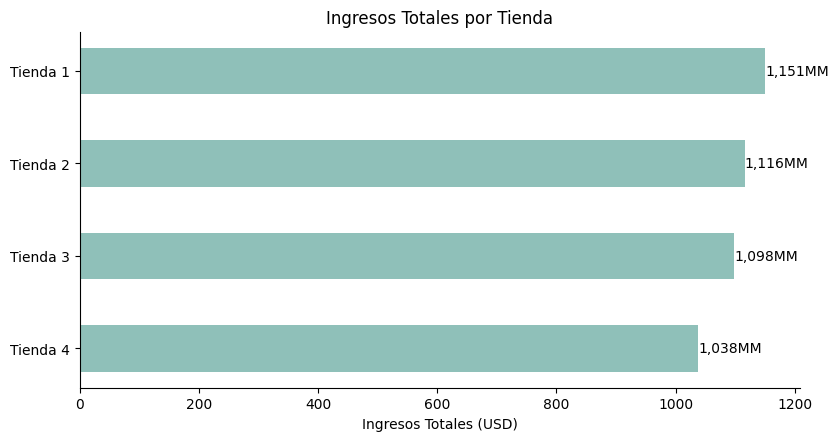

In [356]:
import matplotlib.pyplot as plt
import numpy as np

ingreso_total['Precio_num'] = ingreso_total['Precio'].replace({'\$': '', '.': ''}, regex=True).astype(int)
ingreso_total = ingreso_total.sort_values(by='Precio_num', ascending=True)

ingreso_total['Precio_num'] = ingreso_total['Precio_num'] / 1_000_000

plt.figure(figsize=(8,4))
plt.barh(ingreso_total['Tienda'], ingreso_total['Precio_num'], color='#8fc0b9', height=0.5)
plt.xlabel("Ingresos Totales (USD)")
plt.title("Ingresos Totales por Tienda")

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(top=1, left=0)

# Agregar etiquetas con formato de miles
for index, value in enumerate(ingreso_total['Precio_num']):
    plt.text(value, index, f"{value:,.0f}MM", va='center')

plt.show()

###Productos más y menos vendidos por tienda

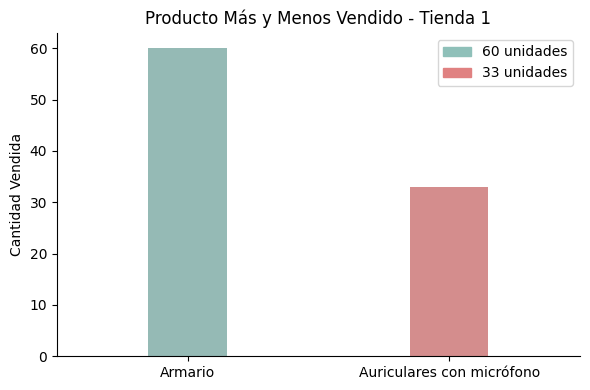

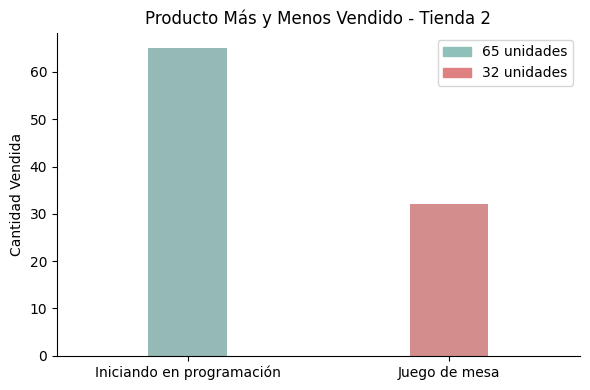

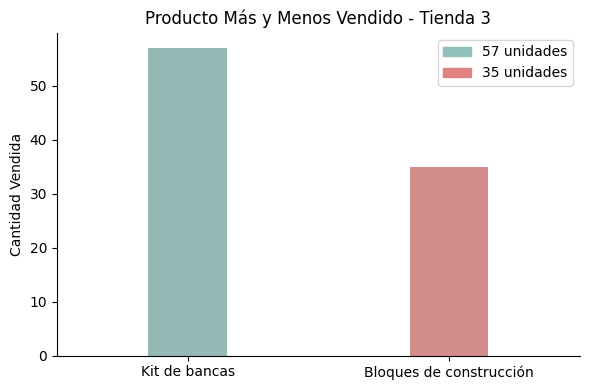

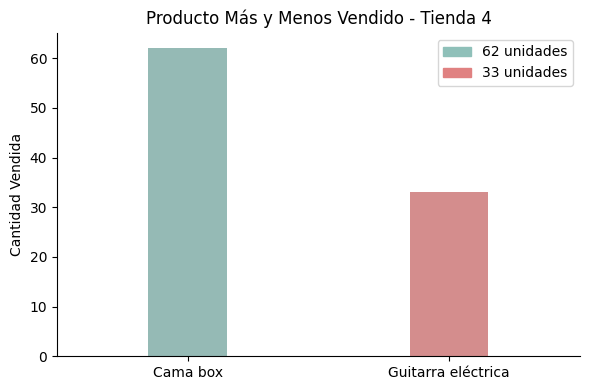

In [357]:
#gráfico por cada tienda
for nombre, df_tienda in tiendas_dict.items():
    productos = df_tienda.groupby("Producto")["Producto"].count().reset_index(name="Cantidad_Vendida")
    productos = productos.sort_values("Cantidad_Vendida", ascending=False)

    #más y menos vendido
    productos_extremos = pd.concat([productos.head(1), productos.tail(1)])

    #barras
    plt.figure(figsize=(6,4))
    colors = ['#8fc0b9', '#e08181']  # azul para más vendido, rojo para menos

    #gráfico
    sns.barplot(
        data=productos_extremos,
        y="Cantidad_Vendida",
        x='Producto',
        palette=colors,
        width=0.3,
        hue=[0,1],
    )


    #leyenda con unidades
    unidades_patch = [
        mpatches.Patch(color=colors[0], label=f"{productos_extremos.iloc[0]['Cantidad_Vendida']} unidades"),
        mpatches.Patch(color=colors[1], label=f"{productos_extremos.iloc[1]['Cantidad_Vendida']} unidades")
    ]
    plt.legend(handles=unidades_patch)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.subplots_adjust(top=1, left=0)

    plt.title(f"Producto Más y Menos Vendido - {nombre}")
    plt.ylabel("Cantidad Vendida")
    plt.xlabel("")
    plt.tight_layout()
    plt.show()

###Ventas por categoría

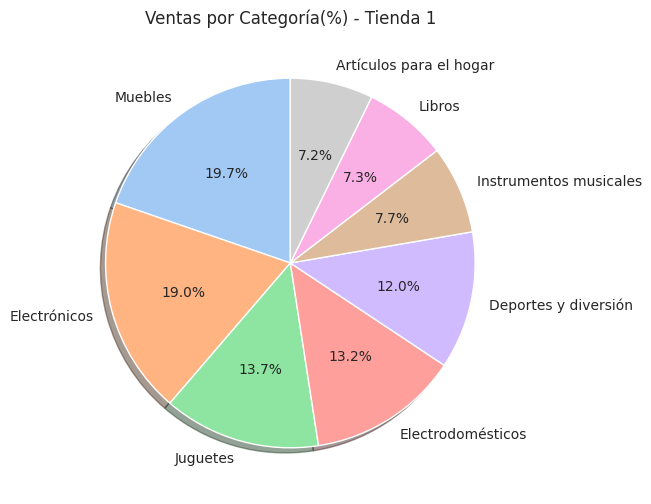

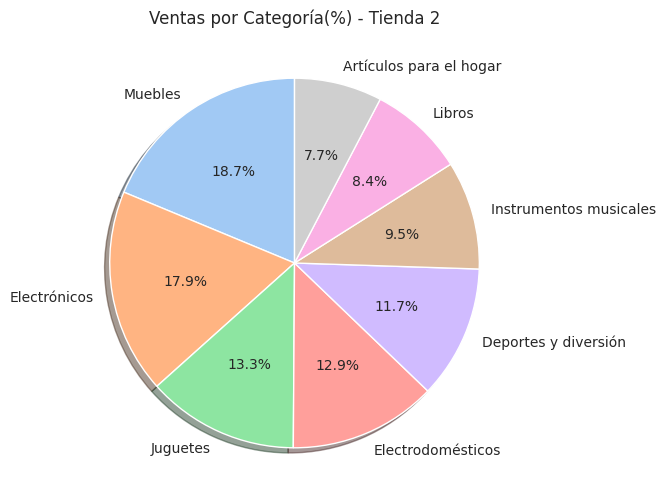

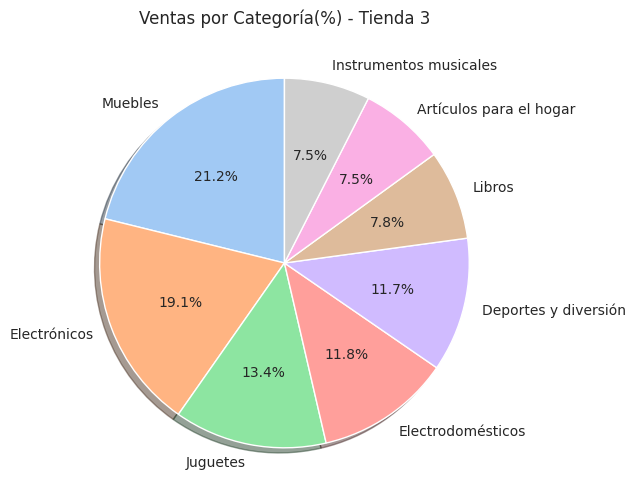

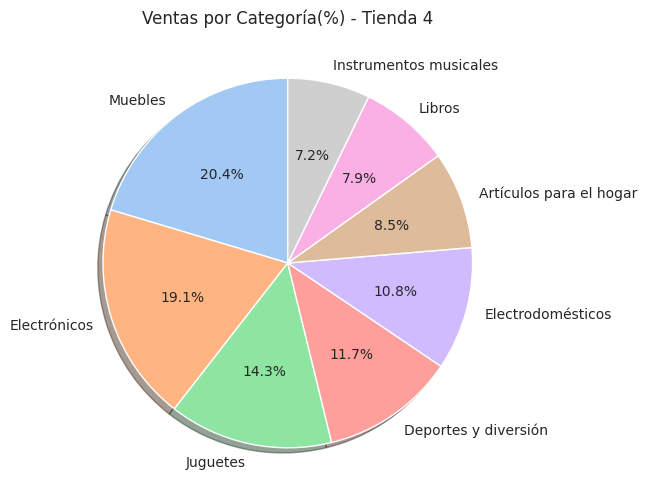

In [404]:
sns.set_style("whitegrid")  # Estilo de Seaborn
for nombre, df_tienda in tiendas_dict.items():
    # Agrupar y contar ventas por categoría
    ventas_categoria = (
        df_tienda.groupby("Categoría del Producto")["Producto"]
        .count()
        .reset_index(name="Cantidad_Vendida")
        .sort_values("Cantidad_Vendida", ascending=False)
    )
    #gráfico
    plt.figure(figsize=(6,6))
    plt.pie(
        ventas_categoria["Cantidad_Vendida"],
        labels=ventas_categoria["Categoría del Producto"],
        autopct="%1.1f%%",
        startangle=90,
        colors=colores,
        shadow=True
    )
    #paleta
    colores = sns.color_palette("pastel")[0:len(ventas_categoria)]
    plt.title(f"Ventas por Categoría(%) - {nombre}")
    plt.show()

# 7. Informe Final de Análisis de Tiendas

Como desafío se nos presentó amalizar la tienda más adecuada para que el Sr.Juan pueda vender sus productos, a partir de un análisis integral de información proveniente de un data base de cuatro tiendas. Se buscó identificar fortalezas y debilidades en el desempeño de cada una, con el fin de respaldar la decisión de negocio.

---

### 1. Ingresos totales por tienda

* **Tienda 1**: \$1,151MM (mayor ingreso total).
* **Tienda 2**: \$1,116MM.
* **Tienda 3**: \$1,098MM.
* **Tienda 4**: \$1,038MM (menor ingreso total).

La **Tienda 1** lidera en ingresos, lo que refleja un alto volumen de ventas y mayor participación en el mercado.

---

### 2. Ventas por categoría

En todas las tiendas, **Muebles y Electrónicos** se posicionan como las categorías más vendidas, lo que muestra un patrón de alta demanda.
Por otra parte, **Libros, Instrumentos musicales y Artículos para el hogar** presentan las menores ventas en general.

Este comportamiento es consistente en las cuatro tiendas.

---

### 3. Calificaciones promedio de clientes

* **Tienda 1**: 3.98 ⭐
* **Tienda 2**: 4.04 ⭐
* **Tienda 3**: 4.05 ⭐ (mejor evaluada).
* **Tienda 4**: 4.00 ⭐

Aunque las diferencias no son muy amplias, la **Tienda 3** destaca por su mejor percepción de calidad y satisfacción de los clientes.

---

### 4. Productos más y menos vendidos

* **Tienda 1**:

  * Más vendido → Armario (60 unidades).
  * Menos vendido → Auriculares con micrófono (33 unidades).
* **Tienda 2**:

  * Más vendido → *Iniciando en programación* (65 unidades).
  * Menos vendido → Juego de mesa (32 unidades).
* **Tienda 3**:

  * Más vendido → Kit de bancas (57 unidades).
  * Menos vendido → Bloques de construcción (35 unidades).
* **Tienda 4**:

  * Más vendido → Cama box (62 unidades).
  * Menos vendido → Guitarra eléctrica (33 unidades).


Se observa que los productos más vendidos están alineados con las categorías de mayor demanda, lo que refuerza la consistencia de los datos.

---

### 5. Costo de envío promedio

* **Tienda 1**: \$26,019 (más alto).
* **Tienda 2**: \$25,216.
* **Tienda 3**: \$24,806.
* **Tienda 4**: \$23,459 (más bajo).

La **Tienda 4** se beneficia con costos de envío más bajos, lo que podría mejorar la competitividad en precios finales.

---

## Conclusión

Tras analizar todos los factores, se recomienda vender los productos en la **Tienda 3**.

Las razones principales son:

* Posee la **mejor calificación promedio de clientes (4.05)**, lo que refleja mayor confianza y satisfacción.

* Presenta un buen equilibrio entre **ingresos (\$1,098MM)** y **costos de envío relativamente bajos (\$24,806)**, manteniendo un desempeño competitivo.

* Sus productos más vendidos corresponden a categorías de alta demanda, lo que favorece la rotación del inventario.


La **Tienda 1** lidera en ingresos, pero su calificación de clientes es la más baja (3.98) y el costo de envío el más alto.

La **Tienda 4** se destaca por el menor costo de envío, pero presenta el ingreso más bajo.

La **Tienda 2**, con buenos ingresos y calificación, queda en segundo lugar, aunque su costo de envío es más alto que el de la Tienda 3.

En conclusión, la **Tienda 3 ofrece el mejor balance entre satisfacción del cliente, costos y rentabilidad**, consolidándose como la opción más recomendable para el Sr. Juan.